In [1]:
import numpy as np
import matplotlib.pyplot as plt

import py4DSTEM
print(py4DSTEM.__version__)

0.14.8


In [2]:
import abtem
import ase
import matplotlib.pyplot as plt

from ase.io import read
from ase.build import surface
from ase.visualize import view


In [3]:
Si_atoms = read(r"C:\Users\Joshu\Desktop\Final model\Tit_pd_fin.cfg")
view(Si_atoms)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>

[########################################] | 100% Completed | 988.40 ms
[########################################] | 100% Completed | 321.24 ms


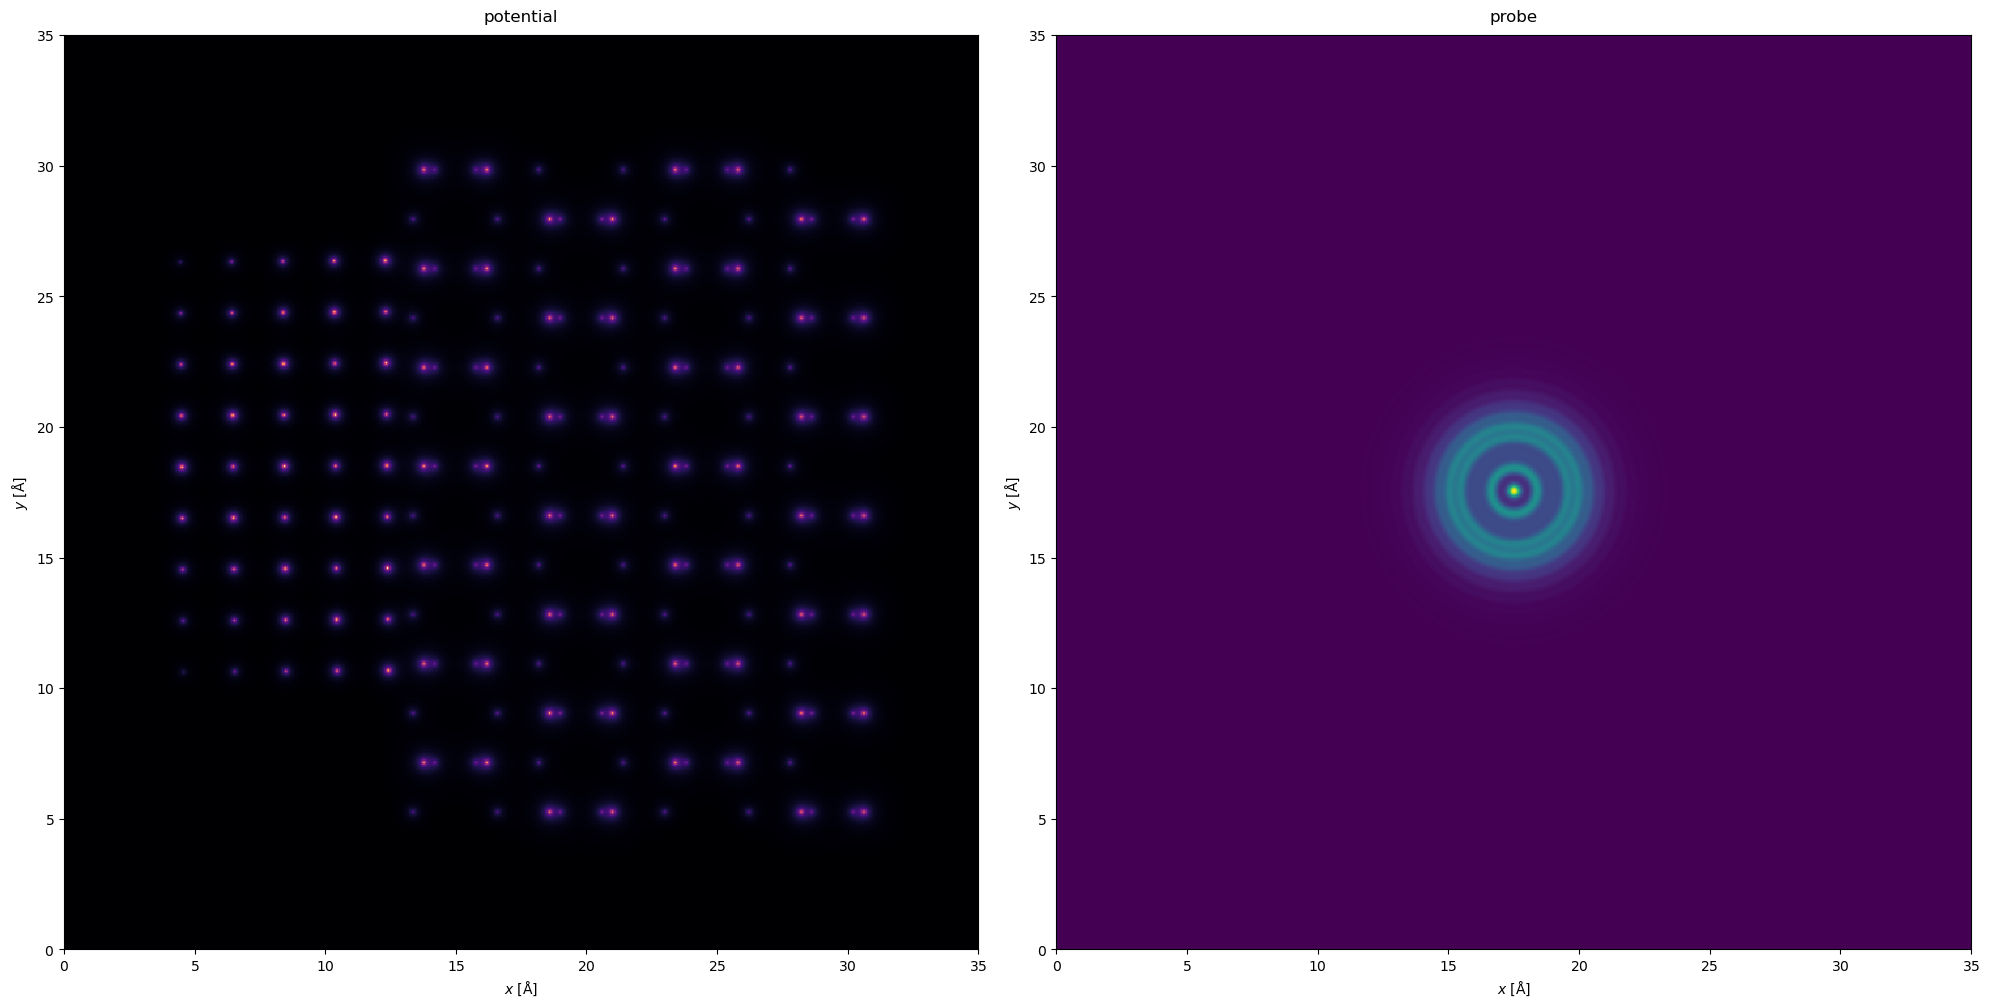

In [5]:
energy = 300e3 # volts
semiangle_cutoff = 25 # mrad
defocus = 150 # ang

potential = abtem.Potential(
    Si_atoms,
    sampling=0.05,
    device="gpu",
    projection="infinite",
    parametrization="lobato",
)

probe = abtem.Probe(
    semiangle_cutoff=semiangle_cutoff,
    energy=energy,
    defocus=defocus,
    device="gpu"
)
probe.match_grid(potential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

potential.show(ax=ax1,cmap='magma', title="potential")
probe.show(ax=ax2, title="probe")
fig.tight_layout()


plt.savefig("probe.png")

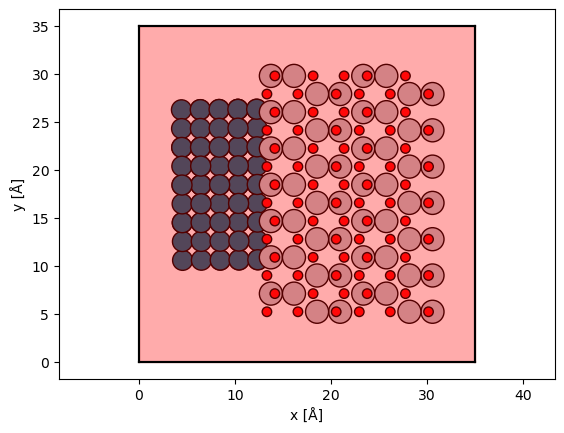

In [5]:
num_detector_pixels = (6*48) # px
maximum_scattering_angle_mrad = 80 # mrad
scan_step_size = 0.8 # ang

resample = 2*maximum_scattering_angle_mrad/num_detector_pixels
pixelated_detector = abtem.PixelatedDetector(
    max_angle=maximum_scattering_angle_mrad*0.975,
    resample=(resample,resample)
)


gridscan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    fractional=True,
    potential=potential,
    sampling=scan_step_size,

)
measurement = probe.scan(scan=gridscan, detectors=pixelated_detector, potential=potential)


fig, ax = abtem.show_atoms(Si_atoms)
gridscan.add_to_plot(ax)

[########################################] | 100% Completed | 187.99 s


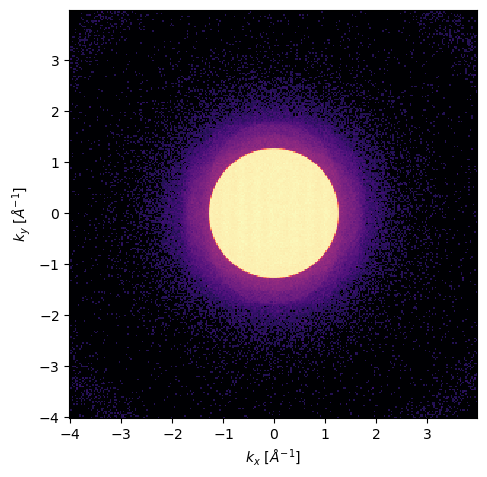

In [6]:
electron_dose = 1e4 # e/A^2

measurement_noise = measurement.poisson_noise(electron_dose)
measurement_noise.mean((0,1)).show(power=0.25,cmap='magma');

In [7]:
raw_datacube = py4DSTEM.DataCube(measurement_noise.array)
raw_datacube.calibration.set_Q_pixel_size(2*maximum_scattering_angle_mrad/num_detector_pixels)
raw_datacube.calibration.set_Q_pixel_units('mrad')
raw_datacube.calibration.set_R_pixel_size(scan_step_size)
raw_datacube.calibration.set_R_pixel_units('A')
raw_datacube.calibration



Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.5555555555555556
             R_pixel_size:    0.8
             Q_pixel_units:   mrad
             R_pixel_units:   A
             QR_flip:         False
)

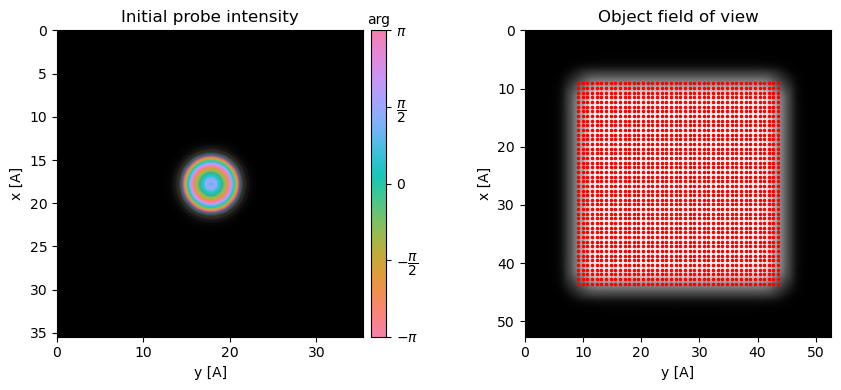

In [8]:
ptycho = py4DSTEM.process.phase.SingleslicePtychographicReconstruction(
    datacube=raw_datacube,
    verbose=False,
    energy=energy,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    #device='gpu',
    object_padding_px=(num_detector_pixels//4,)*2,
    object_type='potential',
).preprocess(
    force_com_rotation=0,
    force_com_transpose=False,
    plot_rotation=False,
    plot_center_of_mass = False,
)

Reconstructing object and probe: 100%|██████████████████████████████████████████| 150/150 [2:28:44<00:00, 59.50s/ iter]


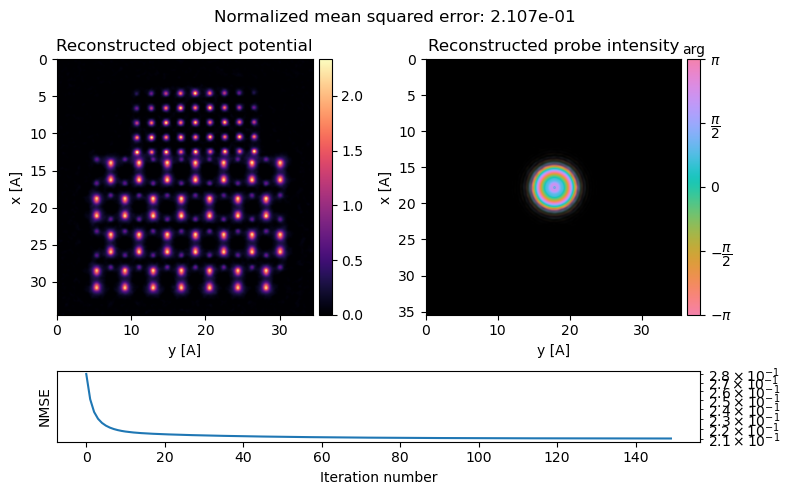

In [9]:
ptycho = ptycho.reconstruct(
    max_iter = 150,
    step_size=0.4,
    reset=True,
).visualize()

plt.savefig('Tit_ptycho_step05.png')

In [10]:
Si_atoms = read(r"C:\Users\Joshu\Desktop\Final model\Alu_fin.cfg")
view(Si_atoms)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>

[########################################] | 100% Completed | 748.86 ms
[########################################] | 100% Completed | 120.32 ms


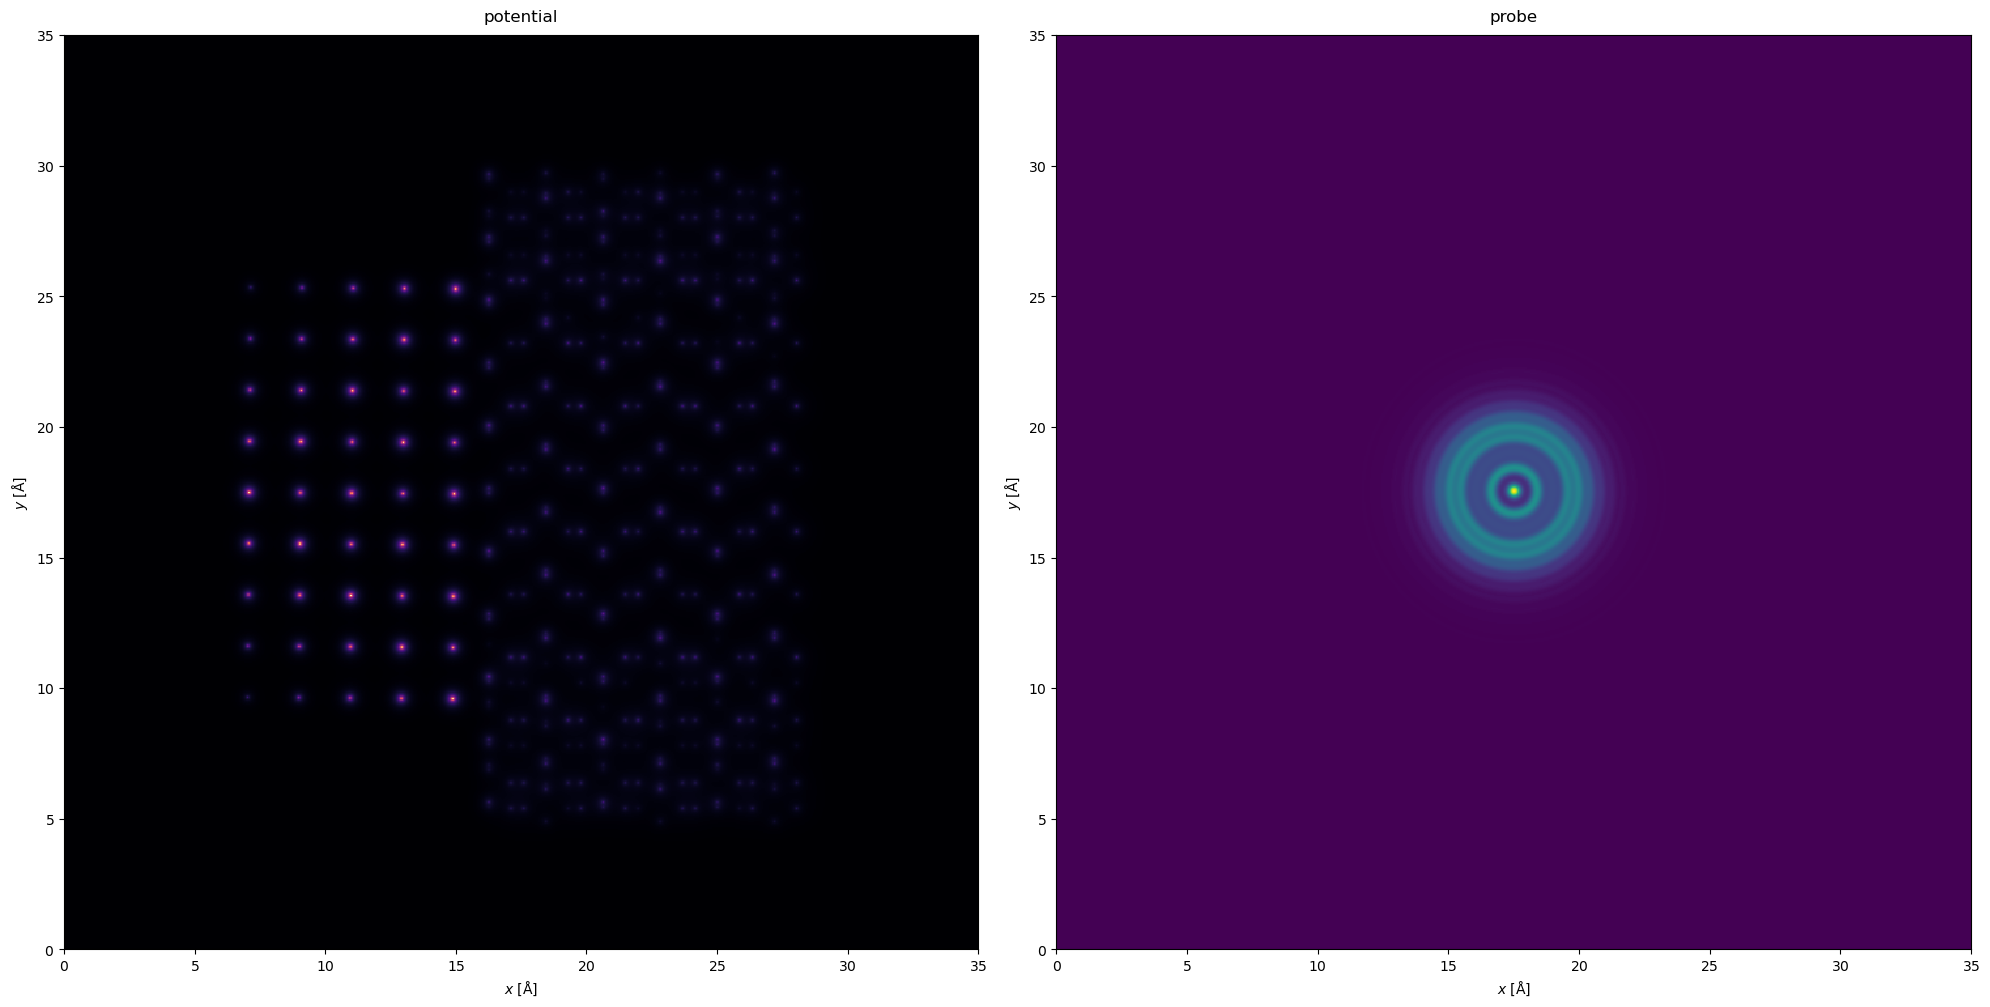

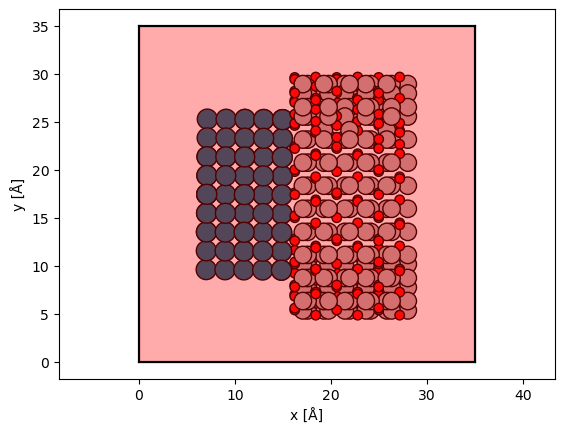

In [11]:
energy = 300e3 # volts
semiangle_cutoff = 25 # mrad
defocus = 150 # ang

potential = abtem.Potential(
    Si_atoms,
    sampling=0.05,
    #device="gpu",
    projection="infinite",
    parametrization="lobato",
)

probe = abtem.Probe(
    semiangle_cutoff=semiangle_cutoff,
    energy=energy,
    defocus=defocus,
    #device="gpu"
)
probe.match_grid(potential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

potential.show(ax=ax1,cmap='magma', title="potential")
probe.show(ax=ax2, title="probe")
fig.tight_layout()

num_detector_pixels = (6*48) # px
maximum_scattering_angle_mrad = 80 # mrad
scan_step_size = 0.8 # ang

resample = 2*maximum_scattering_angle_mrad/num_detector_pixels
pixelated_detector = abtem.PixelatedDetector(
    max_angle=maximum_scattering_angle_mrad*0.975,
    resample=(resample,resample)
)


gridscan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    fractional=True,
    potential=potential,
    sampling=scan_step_size,

)
measurement = probe.scan(scan=gridscan, detectors=pixelated_detector, potential=potential)


fig, ax = abtem.show_atoms(Si_atoms)
gridscan.add_to_plot(ax)


[########################################] | 100% Completed | 190.97 s


Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.5555555555555556
             R_pixel_size:    0.8
             Q_pixel_units:   mrad
             R_pixel_units:   A
             QR_flip:         False
)

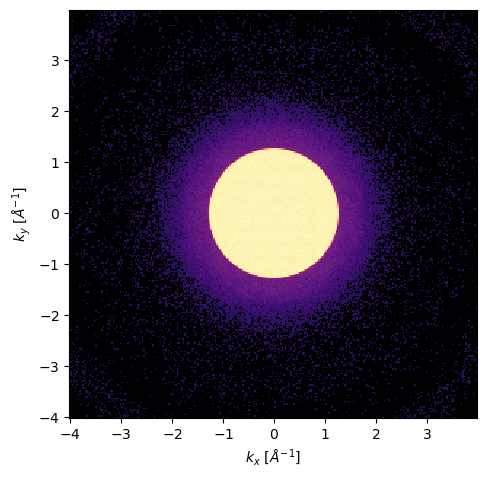

In [12]:
electron_dose = 1e4 # e/A^2

measurement_noise = measurement.poisson_noise(electron_dose)
measurement_noise.mean((0,1)).show(power=0.25,cmap='magma');

raw_datacube = py4DSTEM.DataCube(measurement_noise.array)
raw_datacube.calibration.set_Q_pixel_size(2*maximum_scattering_angle_mrad/num_detector_pixels)
raw_datacube.calibration.set_Q_pixel_units('mrad')
raw_datacube.calibration.set_R_pixel_size(scan_step_size)
raw_datacube.calibration.set_R_pixel_units('A')
raw_datacube.calibration


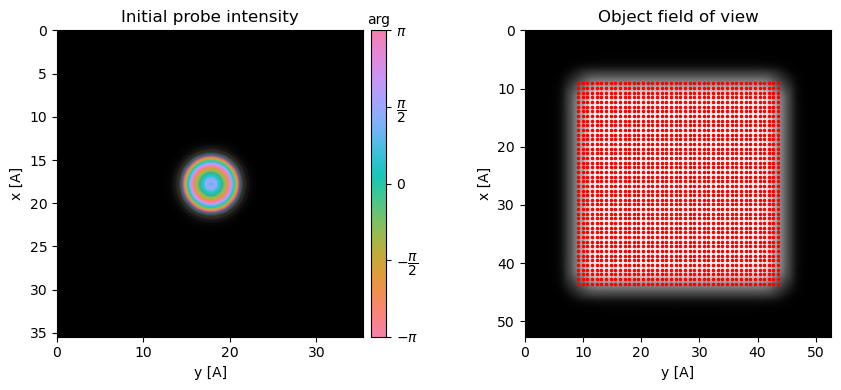

In [13]:
ptycho = py4DSTEM.process.phase.SingleslicePtychographicReconstruction(
    datacube=raw_datacube,
    verbose=False,
    energy=energy,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    #device='gpu',
    object_padding_px=(num_detector_pixels//4,)*2,
    object_type='potential',
).preprocess(
    force_com_rotation=0,
    force_com_transpose=False,
    plot_rotation=False,
    plot_center_of_mass = False,
)

Reconstructing object and probe: 100%|██████████████████████████████████████████| 150/150 [2:28:44<00:00, 59.50s/ iter]


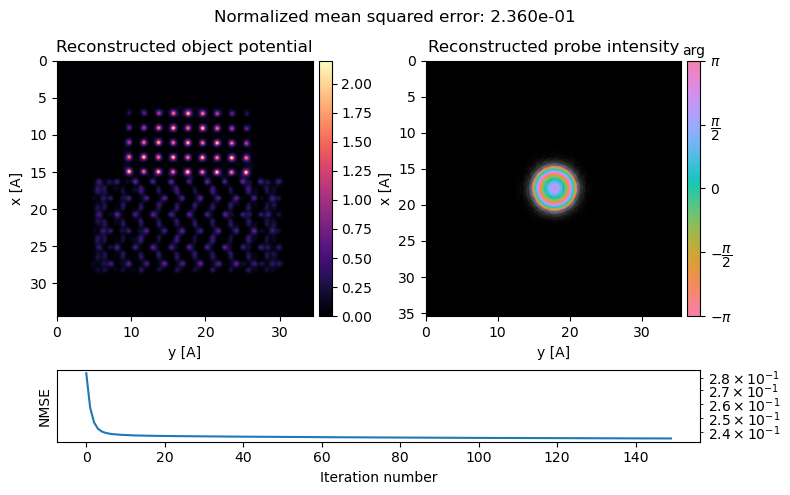

In [14]:
ptycho = ptycho.reconstruct(
    max_iter = 150,
    step_size=0.4,
    reset=True,
).visualize()

plt.savefig('Alu_ptycho_step05.png')

In [15]:
Si_atoms = read(r"C:\Users\Joshu\Desktop\Final model\zno_fin.cfg")
view(Si_atoms)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>

[########################################] | 100% Completed | 654.38 ms
[########################################] | 100% Completed | 105.44 ms


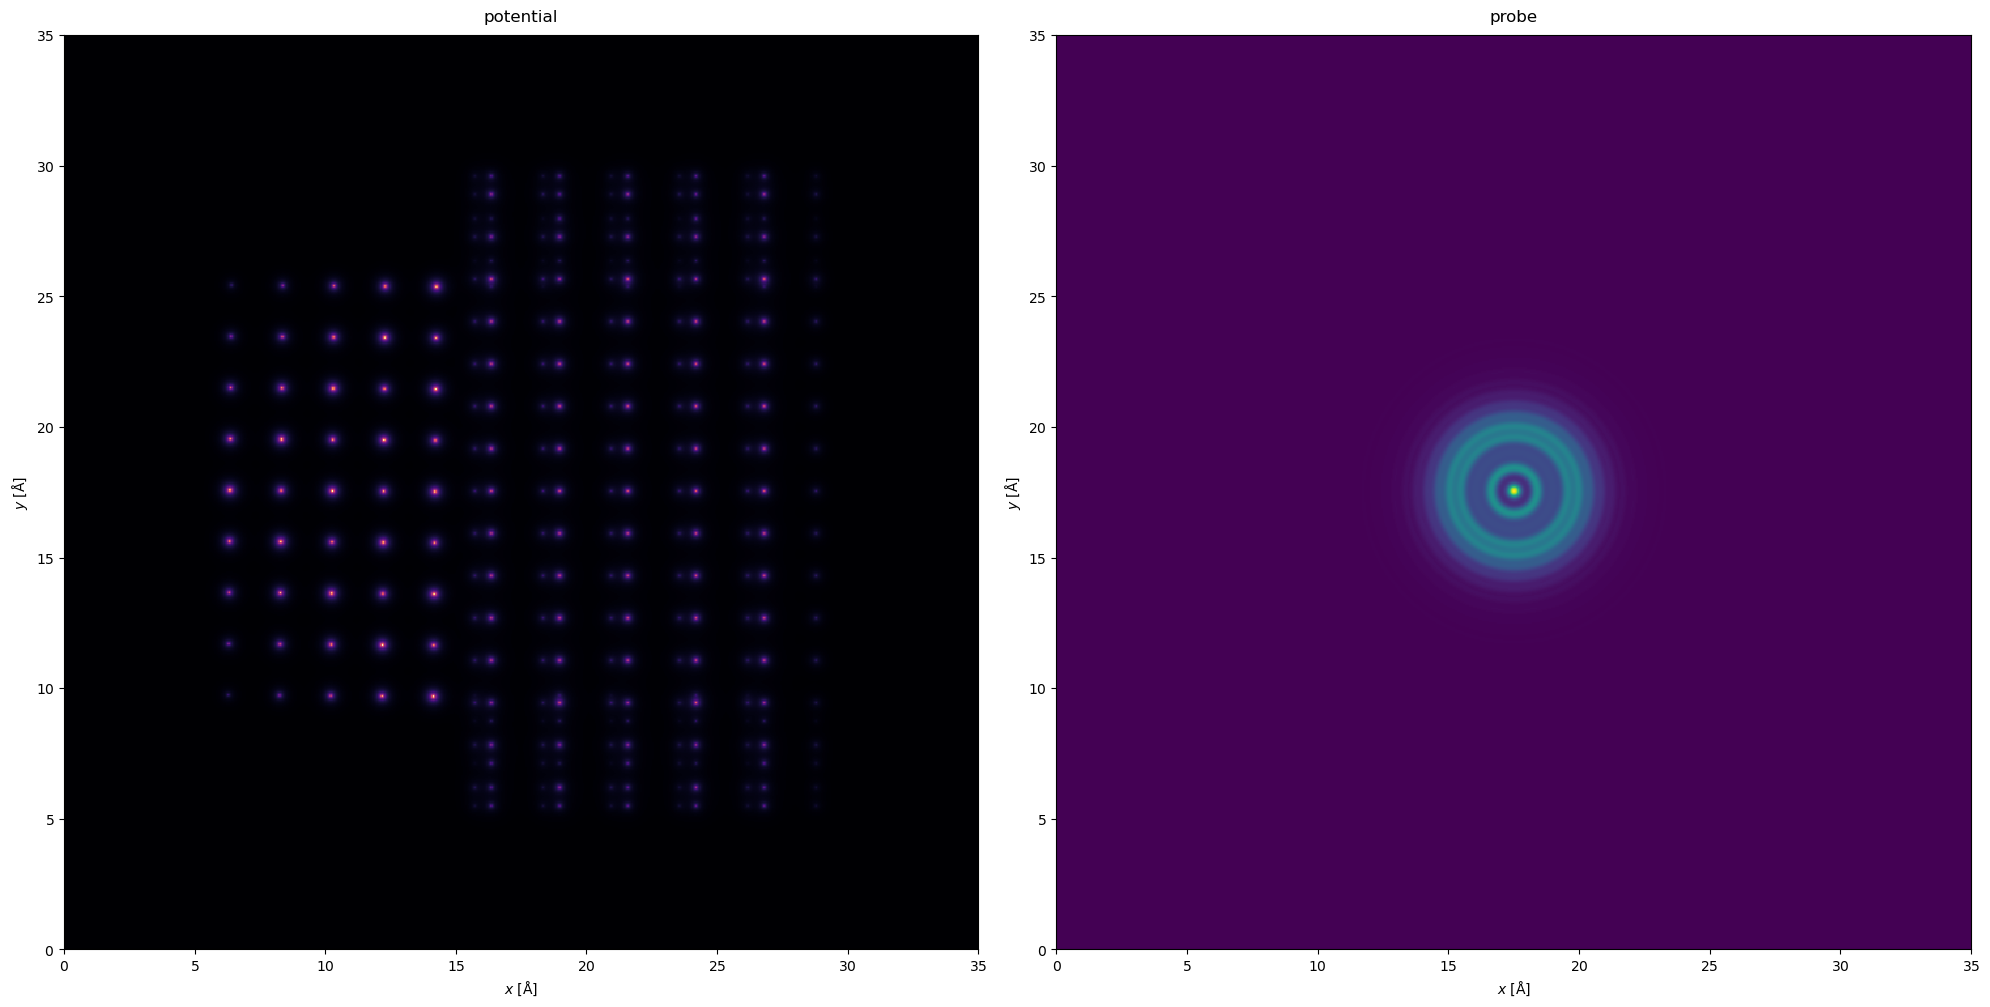

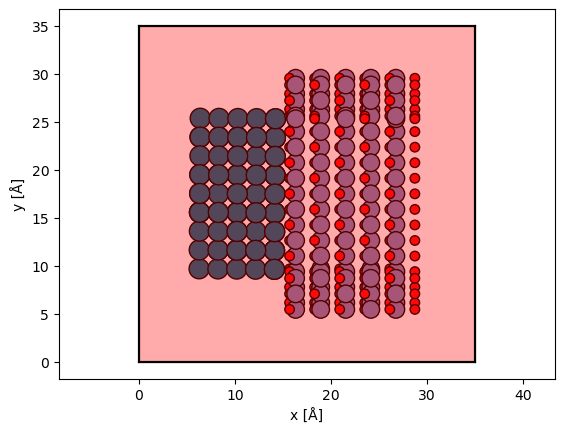

In [16]:
energy = 300e3 # volts
semiangle_cutoff = 25 # mrad
defocus = 150 # ang

potential = abtem.Potential(
    Si_atoms,
    sampling=0.05,
    #device="gpu",
    projection="infinite",
    parametrization="lobato",
)

probe = abtem.Probe(
    semiangle_cutoff=semiangle_cutoff,
    energy=energy,
    defocus=defocus,
    #device="gpu"
)
probe.match_grid(potential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

potential.show(ax=ax1,cmap='magma', title="potential")
probe.show(ax=ax2, title="probe")
fig.tight_layout()

num_detector_pixels = (6*48) # px
maximum_scattering_angle_mrad = 80 # mrad
scan_step_size = 0.8 # ang

resample = 2*maximum_scattering_angle_mrad/num_detector_pixels
pixelated_detector = abtem.PixelatedDetector(
    max_angle=maximum_scattering_angle_mrad*0.975,
    resample=(resample,resample)
)


gridscan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    fractional=True,
    potential=potential,
    sampling=scan_step_size,

)
measurement = probe.scan(scan=gridscan, detectors=pixelated_detector, potential=potential)


fig, ax = abtem.show_atoms(Si_atoms)
gridscan.add_to_plot(ax)

[########################################] | 100% Completed | 189.89 s


Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.5555555555555556
             R_pixel_size:    0.8
             Q_pixel_units:   mrad
             R_pixel_units:   A
             QR_flip:         False
)

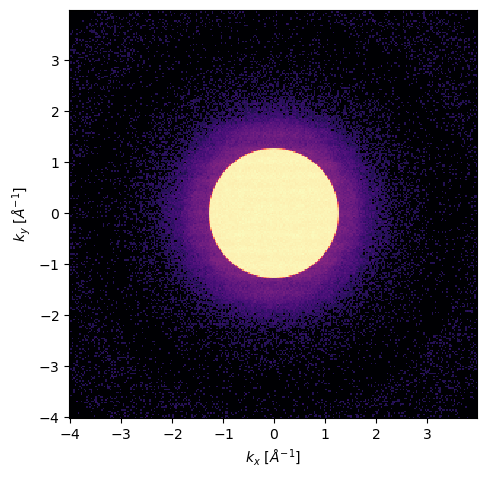

In [17]:
electron_dose = 1e4 # e/A^2

measurement_noise = measurement.poisson_noise(electron_dose)
measurement_noise.mean((0,1)).show(power=0.25,cmap='magma');

raw_datacube = py4DSTEM.DataCube(measurement_noise.array)
raw_datacube.calibration.set_Q_pixel_size(2*maximum_scattering_angle_mrad/num_detector_pixels)
raw_datacube.calibration.set_Q_pixel_units('mrad')
raw_datacube.calibration.set_R_pixel_size(scan_step_size)
raw_datacube.calibration.set_R_pixel_units('A')
raw_datacube.calibration


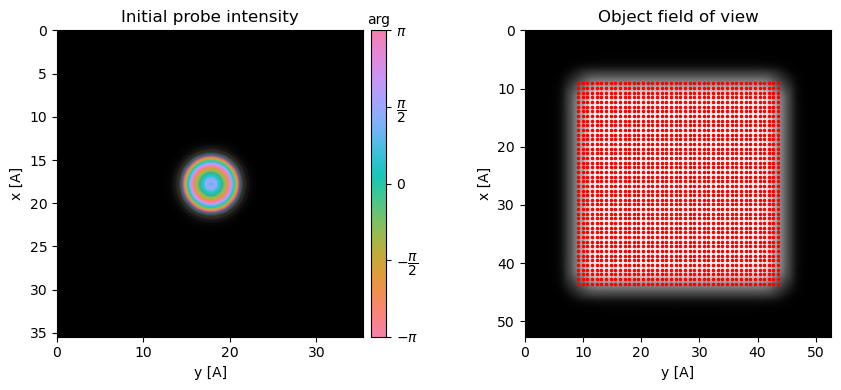

In [18]:
ptycho = py4DSTEM.process.phase.SingleslicePtychographicReconstruction(
    datacube=raw_datacube,
    verbose=False,
    energy=energy,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    #device='gpu',
    object_padding_px=(num_detector_pixels//4,)*2,
    object_type='potential',
).preprocess(
    force_com_rotation=0,
    force_com_transpose=False,
    plot_rotation=False,
    plot_center_of_mass = False,
)

Reconstructing object and probe: 100%|██████████████████████████████████████████| 150/150 [3:03:53<00:00, 73.56s/ iter]


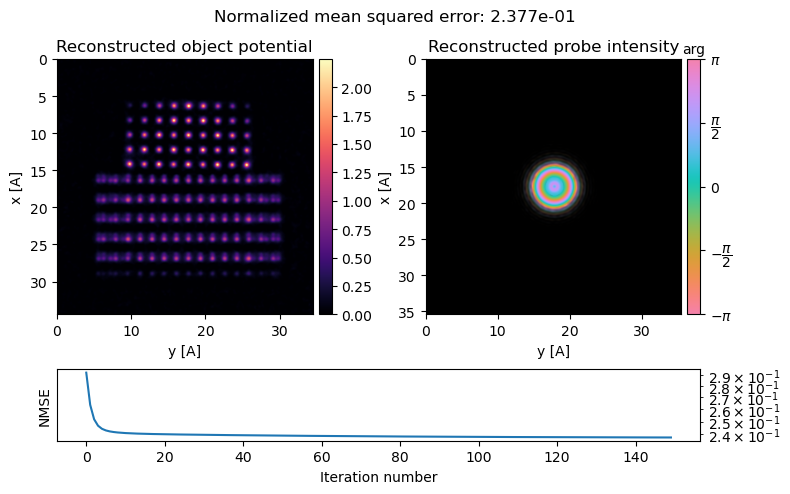

In [19]:
ptycho = ptycho.reconstruct(
    max_iter = 150,
    step_size=0.4,
    reset=True,
).visualize()

plt.savefig('zno_ptycho_step05.png')